In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [186]:
df = pd.read_csv('df_final_merge.csv', parse_dates=['fecha'])

C:\Users\nicol\AppData\Local\Temp\ipykernel_5824\3285794857.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('df_final_merge.csv', parse_dates=['fecha'])


In [187]:
df

,Unnamed: 0,n_comprobante,fecha,cliente,codigo,cantidad,descripcion,p_unitario,iva,precio_final,rubro
0,0,B 0003- 00176324,2023-01-01,Cliente: Consumidor Final (1),6262,1,Coca Cola Lata 310 cc,180.0,21.0,180.0,coca cola (308)
1,1,B 0003- 00176324,2023-01-01,Cliente: Consumidor Final (1),100,2,Alfajor Fantoche Triple Blanco,150.0,21.0,300.0,alfajores (5)
2,2,B 0003- 00176325,2023-01-01,Cliente: Consumidor Final (1),7894680,1,Doritos queso 45g,280.0,21.0,280.0,lays (24)
3,3,B 0003- 00176325,2023-01-01,Cliente: Consumidor Final (1),907,1,Sprite 1500cc,470.0,21.0,470.0,coca cola (308)
4,4,B 0003- 00176326,2023-01-01,Cliente: Consumidor Final (1),6848,1,Tabaco Las Hojas Clasico 50g,340.0,21.0,340.0,cigarrillos
...,...,...,...,...,...,...,...,...,...,...,...
29731,29731,B 0003- 00194212,2023-05-14,Cliente: Consumidor Final (1),7893764,1,Fanta lata 310,210.0,21.0,210.0,coca cola (308)
29732,29732,B 0003- 00194213,2023-05-14,Cliente: Billetera (23),9541074,1,coca cola zero 1L,500.0,21.0,500.0,coca cola (308)
29733,29733,B 0003- 00194213,2023-05-14,Cliente: Billetera (23),7895022,1,Leche descremada Tregar,440.0,21.0,440.0,lacteos (28)
29734,29734,B 0003- 00194213,2023-05-14,Cliente: Billetera (23),6155,3,Barrita kinder 12.5 g,70.0,21.0,210.0,chocolates (4)


In [188]:
#pd.to_datetime(df['fecha'], dayfirst=True)

In [189]:
df.head()

,Unnamed: 0,n_comprobante,fecha,cliente,codigo,cantidad,descripcion,p_unitario,iva,precio_final,rubro
0,0,B 0003- 00176324,2023-01-01,Cliente: Consumidor Final (1),6262,1,Coca Cola Lata 310 cc,180.0,21.0,180.0,coca cola (308)
1,1,B 0003- 00176324,2023-01-01,Cliente: Consumidor Final (1),100,2,Alfajor Fantoche Triple Blanco,150.0,21.0,300.0,alfajores (5)
2,2,B 0003- 00176325,2023-01-01,Cliente: Consumidor Final (1),7894680,1,Doritos queso 45g,280.0,21.0,280.0,lays (24)
3,3,B 0003- 00176325,2023-01-01,Cliente: Consumidor Final (1),907,1,Sprite 1500cc,470.0,21.0,470.0,coca cola (308)
4,4,B 0003- 00176326,2023-01-01,Cliente: Consumidor Final (1),6848,1,Tabaco Las Hojas Clasico 50g,340.0,21.0,340.0,cigarrillos


In [190]:
df.tail()

,Unnamed: 0,n_comprobante,fecha,cliente,codigo,cantidad,descripcion,p_unitario,iva,precio_final,rubro
29731,29731,B 0003- 00194212,2023-05-14,Cliente: Consumidor Final (1),7893764,1,Fanta lata 310,210.0,21.0,210.0,coca cola (308)
29732,29732,B 0003- 00194213,2023-05-14,Cliente: Billetera (23),9541074,1,coca cola zero 1L,500.0,21.0,500.0,coca cola (308)
29733,29733,B 0003- 00194213,2023-05-14,Cliente: Billetera (23),7895022,1,Leche descremada Tregar,440.0,21.0,440.0,lacteos (28)
29734,29734,B 0003- 00194213,2023-05-14,Cliente: Billetera (23),6155,3,Barrita kinder 12.5 g,70.0,21.0,210.0,chocolates (4)
29735,29735,B 0003- 00194214,2023-05-14,Cliente: Consumidor Final (1),3647,1,lucky clic cool 12,400.0,21.0,400.0,cigarrillos


In [191]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [192]:
df['venta'] = df.groupby(by=['n_comprobante','fecha'])['precio_final'].cumsum()

In [193]:
df['acum_dia'] = df.groupby(df['fecha'])['precio_final'].cumsum()

In [194]:
df['acum'] = df['precio_final'].cumsum()

In [195]:
df_indexado = df.set_index(['fecha'])
df_indexado

,n_comprobante,cliente,codigo,cantidad,descripcion,p_unitario,iva,precio_final,rubro,venta,acum_dia,acum
fecha,,,,,,,,,,,,
2023-01-01,B 0003- 00176324,Cliente: Consumidor Final (1),6262,1,Coca Cola Lata 310 cc,180.0,21.0,180.0,coca cola (308),180.0,180.0,180.0
2023-01-01,B 0003- 00176324,Cliente: Consumidor Final (1),100,2,Alfajor Fantoche Triple Blanco,150.0,21.0,300.0,alfajores (5),480.0,480.0,480.0
2023-01-01,B 0003- 00176325,Cliente: Consumidor Final (1),7894680,1,Doritos queso 45g,280.0,21.0,280.0,lays (24),280.0,760.0,760.0
2023-01-01,B 0003- 00176325,Cliente: Consumidor Final (1),907,1,Sprite 1500cc,470.0,21.0,470.0,coca cola (308),750.0,1230.0,1230.0
2023-01-01,B 0003- 00176326,Cliente: Consumidor Final (1),6848,1,Tabaco Las Hojas Clasico 50g,340.0,21.0,340.0,cigarrillos,340.0,1570.0,1570.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-14,B 0003- 00194212,Cliente: Consumidor Final (1),7893764,1,Fanta lata 310,210.0,21.0,210.0,coca cola (308),210.0,20655.0,11741354.0
2023-05-14,B 0003- 00194213,Cliente: Billetera (23),9541074,1,coca cola zero 1L,500.0,21.0,500.0,coca cola (308),500.0,21155.0,11741854.0
2023-05-14,B 0003- 00194213,Cliente: Billetera (23),7895022,1,Leche descremada Tregar,440.0,21.0,440.0,lacteos (28),940.0,21595.0,11742294.0


In [196]:
ventas_total = df.groupby('rubro')[['venta']].sum().sort_values(by='venta',ascending=False)

In [197]:
ventas_total

,venta
rubro,
cigarrillos,3069105.0
coca cola (308),1993090.0
9999,1974869.0
cervezas (26),1750741.0
quilmes (312),1090295.0
lays (24),950665.0
comida (30),927895.0
pepsi (309),900450.0
sandwich (1.500),710836.0


In [198]:
ventas_clientes = pd.DataFrame(df_indexado.groupby('cliente')['venta'].sum())
ventas_clientes.reset_index(inplace=True)
ventas_clientes.sort_values(by='venta',ascending=False, inplace=True)
ventas_clientes = ventas_clientes.iloc[0:3]
ventas_clientes

,cliente,venta
2,Cliente: Consumidor Final (1),14720133.0
8,Cliente: QR Nico (21),2583115.0
1,Cliente: Billetera (23),2478152.0


<BarContainer object of 3 artists>

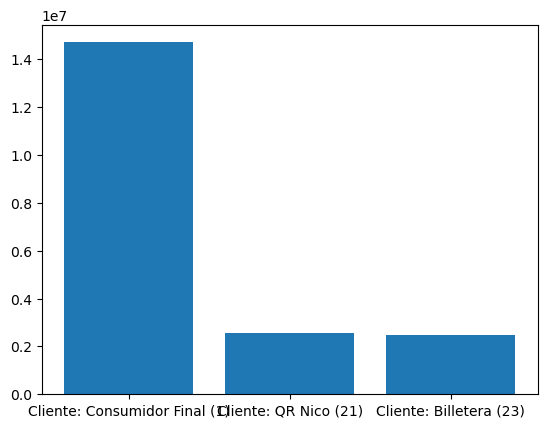

In [199]:
plt.bar(height=ventas_clientes['venta'], x = ventas_clientes['cliente'])

In [200]:
ventas_por_productos = df_indexado.groupby('descripcion')['venta'].sum().sort_values(ascending=False)
ventas_por_productos.iloc[0:25]

descripcion
Caramelos (alka 3*10 super 2*10 butter 30)    561706.0
Heineken Ret x 1L                             548515.0
sanguche milanesa jamon, queso casero         302945.0
Coca Cola 1500 cc                             294870.0
Lata Heineken 473 cm3                         291955.0
Lucky box convertible 20                      249775.0
Santa Fe Lata 473cc                           235150.0
PIZZA ESPECIAL/MUZZA/NAPO/CANTI/ROQUE         227620.0
Triple Grande Migamax                         224845.0
coca cola retornable 2000                     224250.0
Quilmes Lata 473cc                            217455.0
Medialuna/Bizcocho                            210770.0
Philip Morris KS                              206250.0
lucky clic cool 12                            204635.0
Coca Cola 2.25cc                              203440.0
Lucky Strike 12                               199065.0
Cafe jarra                                    192220.0
Marlboro Box                                  191960.

In [201]:
df_indexado[df_indexado['rubro']=='9999']['venta'].max()

9390.0

In [202]:
df_indexado[df_indexado['codigo']== 9541175]

,n_comprobante,cliente,codigo,cantidad,descripcion,p_unitario,iva,precio_final,rubro,venta,acum_dia,acum
fecha,,,,,,,,,,,,
2023-05-12,B 0003- 00193875,Cliente: Consumidor Final (1),9541175,1,tabaco las hojas premium uva 30g,860.0,21.0,860.0,9999,1960.0,17515.0,11454739.0


In [203]:
df_indexado.resample('W')['venta'].sum()

fecha
2023-01-01      42160.0
2023-01-08     893040.0
2023-01-15     857705.0
2023-01-22     775780.0
2023-01-29     767955.0
2023-02-05    1159848.0
2023-02-12    1124170.0
2023-02-19     944597.0
2023-02-26    1052575.0
2023-03-05    1002615.0
2023-03-12    1261275.0
2023-03-19    1217430.0
2023-03-26     954205.0
2023-04-02    1098840.0
2023-04-09    1114890.0
2023-04-16    1179220.0
2023-04-23    1023065.0
2023-04-30    1283165.0
2023-05-07    1056785.0
2023-05-14    1214260.0
Freq: W-SUN, Name: venta, dtype: float64

In [206]:
df_indexado.resample('M')['venta'].sum()

fecha
2023-01-31    3610000.0
2023-02-28    4257975.0
2023-03-31    4966845.0
2023-04-30    4917715.0
2023-05-31    2271045.0
Freq: M, Name: venta, dtype: float64

In [219]:
# Otra forma de hacerlo

df_indexado.reset_index(inplace=True)
df_indexado.groupby(df_indexado['fecha'].dt.week).sum()

C:\Users\nicol\AppData\Local\Temp\ipykernel_5824\175125517.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_indexado.groupby(df_indexado['fecha'].dt.week).sum()
C:\Users\nicol\AppData\Local\Temp\ipykernel_5824\175125517.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_indexado.groupby(df_indexado['fecha'].dt.week).sum()


,level_0,index,codigo,cantidad,p_unitario,iva,precio_final,venta,acum_dia,acum
fecha,,,,,,,,,,
1,1167729,1167729,4397278715,3773,415233.0,29001.0,524015.0,893040.0,52353525.0,3.958336e+08
2,3169716,3169716,4156402527,3915,396910.5,28843.5,494455.0,857705.0,51859990.0,1.117113e+09
3,4590720,4590720,3676976653,2800,372086.0,26113.5,459775.0,775780.0,40041915.0,1.611411e+09
4,6500139,6500139,4430276216,3626,377182.0,27079.5,465655.0,767955.0,43482270.0,2.296094e+09
5,10348000,10348000,5311899393,3389,500613.0,33159.0,630272.0,1159848.0,70864093.0,3.690976e+09
6,14266985,14266985,4997186946,4325,538260.0,36277.5,647980.0,1124170.0,78692315.0,5.141625e+09
7,15799821,15799821,4487100793,3926,488763.0,32802.0,594981.0,944597.0,66483380.0,5.711051e+09
8,17437075,17437075,4426217996,5206,480254.5,31353.0,608825.0,1052575.0,64500025.0,6.354351e+09
9,21121844,21121844,4936366235,2240,522010.0,33232.5,624045.0,1002615.0,71268300.0,7.749658e+09
